In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
titanicData = '/kaggle/input/titanic/train.csv'
trainData = pd.read_csv(titanicData)

In [ ]:
trainData.head()

In [ ]:
y = trainData.Survived
features = ['Sex', 'Age', 'Pclass', 'SibSp', 'Parch', 'Fare']
X = trainData[features]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size = 0.7, test_size = 0.3)

In [ ]:
#now we are making our sex from M/F into numerical divisions to make our data read the numbers

import category_encoders as ce
encoder = ce.OrdinalEncoder(cols = ['Sex'])

X_train = encoder.fit_transform(X_train)
X_valid = encoder.fit_transform(X_valid)

In [ ]:
X_train.head()
#as we can see, sex is now 1/2

In [ ]:
#now let's remove the missing values and replace them with the mean of the rest of the data to get more accurate data

from sklearn.impute import SimpleImputer

my_imputer = SimpleImputer(strategy = 'mean')
X_train_imputed = my_imputer.fit_transform(X_train)
X_valid_imputed = my_imputer.fit_transform(X_valid)

In [ ]:
#now we can work with our data!
#let's make a random forest as our third way to predict

In [ ]:
from sklearn.ensemble import RandomForestClassifier
#random_state can be any number - why??

rfc = RandomForestClassifier(random_state = 1)
rfc.fit(X_train_imputed, y_train)
y_pred = rfc.predict(X_valid_imputed)

from sklearn.metrics import classification_report
print(classification_report(y_valid, y_pred))

In [ ]:
#random trees are automatically 100 trees - let's make it smaller to simplify our predictions

rfc_25 = RandomForestClassifier(n_estimators = 25, random_state = 1)
rfc_25.fit(X_train_imputed, y_train)
y_pred_25 = rfc_25.predict(X_valid_imputed)

from sklearn.metrics import classification_report
print(classification_report(y_valid, y_pred_25))

In [ ]:
#steps to fit our models:
#1) make the model
#2) fit it
#3) predict it
#4) print it

In [146]:
#this shows us the importance of each feature in predicting death

feature_scores = pd.Series(rfc_25.feature_importances_, index = X_train.columns).sort_values(ascending = False)
feature_scores

Sex       0.275631
Fare      0.271387
Age       0.264327
Pclass    0.085822
SibSp     0.060472
Parch     0.042361
dtype: float64

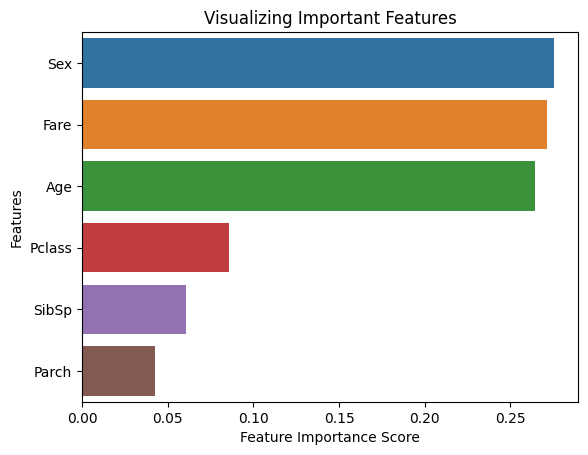

In [147]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x=feature_scores, y = feature_scores.index)

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')

plt.title("Visualizing Important Features")

plt.show()